# Labolatorium 1

### Autorzy:
Patryk Klatka \
Wojciech Łoboda

## Import bibliotek oraz ich konfiguracja

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Matplotlib settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

## Rekurencyjne mnożenie macierzy metodą Binet'a

Rekurencyjne mnożenie macierzy metodą Binet'a to nic innego jak klasyczne mnożenie macierzy, lecz z wykorzystaniem rekurencji. W tym przypadku rekurencja polega na podziale macierzy na mniejsze podmacierze, aż do uzyskania macierzy 1x1, która jest mnożona przez samą siebie. Następnie wyniki są sumowane w odpowiedni sposób, aby otrzymać wynik końcowy. Pseudokod algorytmu wygląda następująco:

```python
binet(A, B)
    n = A.rows
    C = new Matrix(n, n)
    if n == 1
        C[0][0] = A[0][0] * B[0][0]
    else
        C[0][0] = binet(A[0][0], B[0][0]) + binet(A[0][1], B[1][0])
        C[0][1] = binet(A[0][0], B[0][1]) + binet(A[0][1], B[1][1])
        C[1][0] = binet(A[1][0], B[0][0]) + binet(A[1][1], B[1][0])
        C[1][1] = binet(A[1][0], B[0][1]) + binet(A[1][1], B[1][1])
    return C
```

Najbardziej istotnym fragmentem powyższego algorytmu jest kod po klauzuli `else`: ten algorytm wymaga 8 mnożeń i 4 dodawań dla każdego wywołania rekurencyjnego. Biorąc tą obserwację pod uwagę, możemy śmiało wywnioskować, że czas wykonywania algorytmu wyniesie:

$$T(n) \le 8*T(n/2) + cn^2, T(1) = 1 $$

gdzie $cn^2$ jest czasem potrzebnym na dodanie dwóch macierzy o rozmiarze $n \times n$. Można rozwiązać ten wzór rekurencyjny za pomocą analizy drzewa rekurencyjnego (tak jak np. [tutaj](https://www.cs.cmu.edu/afs/cs/academic/class/15750-s17/ScribeNotes/lecture1.pdf)) i zauważyć, że $T(n) = O(n^3)$.

In [3]:
def binet(A,B):
    operation_count = 0
    n = A.shape[0]
    if n == 1:
        operation_count += 1
        return A * B, operation_count
    else:
        A11 = A[:n//2, :n//2]
        A12 = A[:n//2, n//2:]
        A21 = A[n//2:, :n//2]
        A22 = A[n//2:, n//2:]
        B11 = B[:n//2, :n//2]
        B12 = B[:n//2, n//2:]
        B21 = B[n//2:, :n//2]
        B22 = B[n//2:, n//2:]
        P1, c1 = binet(A11, B11)
        P2, c2 = binet(A12, B21)
        P3, c3 = binet(A11, B12)
        P4, c4 = binet(A12, B22)
        P5, c5 = binet(A21, B11)
        P6, c6 = binet(A22, B21)
        P7, c7 = binet(A21, B12)
        P8, c8 = binet(A22, B22)
        C11 = P1 + P2
        C12 = P3 + P4
        C21 = P5 + P6
        C22 = P7 + P8
        operation_count += c1 + c2 + c3 + c4 + c5 + c6 + c7 + c8
        C = np.zeros((n, n))
        C[:n//2, :n//2] = C11
        C[:n//2, n//2:] = C12
        C[n//2:, :n//2] = C21
        C[n//2:, n//2:] = C22
        return C, operation_count

### Test poprawności algorytmu

In [12]:
test_matrix = np.array([
    [5,1,3,4],
    [0,1,8,5],
    [9,3,6,1],
    [7,3,9,2]
])

m1 = binet(test_matrix, test_matrix)[0]
m2 = test_matrix @ test_matrix
print(np.allclose(m1, m2))

True


## Rekurencyjne mnożenie macierzy metodą Strassena

Rekurencyjne mnożenie macierzy metodą Strassena jest podobne do mnożenia metodą Binet'a, lecz zamiast 8 mnożeń i 4 dodawań, potrzebuje 7 mnożeń i 18 dodawań. Pseudokod algorytmu wygląda następująco:

```python
strassen(A, B)
    n = A.rows
    C = new Matrix(n, n)
    if n == 1
        C[0][0] = A[0][0] * B[0][0]
    else
        A11 = A[0][0]
        A12 = A[0][1]
        A21 = A[1][0]
        A22 = A[1][1]
        B11 = B[0][0]
        B12 = B[0][1]
        B21 = B[1][0]
        B22 = B[1][1]
        P1 = strassen(A11, B12 - B22)
        P2 = strassen(A11 + A12, B22)
        P3 = strassen(A21 + A22, B11)
        P4 = strassen(A22, B21 - B11)
        P5 = strassen(A11 + A22, B11 + B22)
        P6 = strassen(A12 - A22, B21 + B22)
        P7 = strassen(A11 - A21, B11 + B12)
        C[0][0] = P5 + P4 - P2 + P6
        C[0][1] = P1 + P2
        C[1][0] = P3 + P4
        C[1][1] = P1 + P5 - P3 - P7
    return C
```

Analogicznie jak w poprzednim algorytmie, najważniejszy fragment kodu znajduje się po klauzuli `else`. Możemy zauważyć, że liczba mnożeń zmniejszyła się o jeden, natomiast liczba dodawań wzrosła do 18. W tym przypadku, czas wykonywania algorytmu wyniesie:
$$T(n) \le 7*T(n/2) + cn^2, T(1) = 1 $$

gdzie $cn^2$ jest czasem potrzebnym na dodanie dwóch macierzy o rozmiarze $n \times n$. Można rozwiązać ten wzór rekurencyjny tak samo jak w poprzednim przykładzie i oszacować, że $T(n) = O(n^{\log_{2}{7}}) = O(n^{2.807...})$.


In [4]:
def strassen(A, B):
    operation_count = 0
    n = A.shape[0]
    if n == 1:
        operation_count += 1
        return A * B, operation_count
    else:
        A11 = A[:n//2, :n//2]
        A12 = A[:n//2, n//2:]
        A21 = A[n//2:, :n//2]
        A22 = A[n//2:, n//2:]
        B11 = B[:n//2, :n//2]
        B12 = B[:n//2, n//2:]
        B21 = B[n//2:, :n//2]
        B22 = B[n//2:, n//2:]
        P1, c1 = strassen(A11+A22, B11+B22)
        P2, c2 = strassen(A21+A22, B11)
        P3, c3 = strassen(A11, B12-B22)
        P4, c4 = strassen(A22, B21-B11)
        P5, c5 = strassen(A11+A12, B22)
        P6, c6 = strassen(A21-A11, B11+B12)
        P7, c7 = strassen(A12-A22, B21+B22)
        C11 = P1 + P4 - P5 + P7
        C12 = P3 + P5
        C21 = P2 + P4
        C22 = P1 + P3 - P2 + P6
        operation_count += c1 + c2 + c3 + c4 + c5 + c6 + c7
        C = np.zeros((n, n))
        C[:n//2, :n//2] = C11
        C[:n//2, n//2:] = C12
        C[n//2:, :n//2] = C21
        C[n//2:, n//2:] = C22
        return C, operation_count

### Test poprawności algorytmu

In [11]:
test_matrix = np.array([
    [5,1,3,4],
    [0,1,8,5],
    [9,3,6,1],
    [7,3,9,2]
])

m1 = strassen(test_matrix, test_matrix)[0]
m2 = test_matrix @ test_matrix
print(np.allclose(m1, m2))

True


## Mnożenie macierzy metodą znalezioną przez AlphaTensor

Bibliografia: https://www.deepmind.com/blog/discovering-novel-algorithms-with-alphatensor

In [138]:
# kod...

## Porównanie algorytmów

In [139]:
# Generate matrices
def generate_matrix(n):
    return np.random.uniform(0.00000001, 1, (n, n))

k = 7
test_matrices = [(generate_matrix(2**i), generate_matrix(2**i)) for i in range(2, k+1)]

### Porównanie czasów wykonania

In [140]:
def plot_execution_times(algorithm, test_matrices):
    execution_times = []
    for A, B in test_matrices:
        start_time = time.time()
        algorithm(A, B)
        end_time = time.time()
        execution_times.append(end_time - start_time)
    plt.title("Execution times for " + algorithm.__name__.title() + " algorithm")
    plt.xlabel("Matrix size")
    plt.ylabel("Time (s)")
    plt.plot([i for i in range(2,k+1)] ,execution_times, 'o-')
    plt.show()

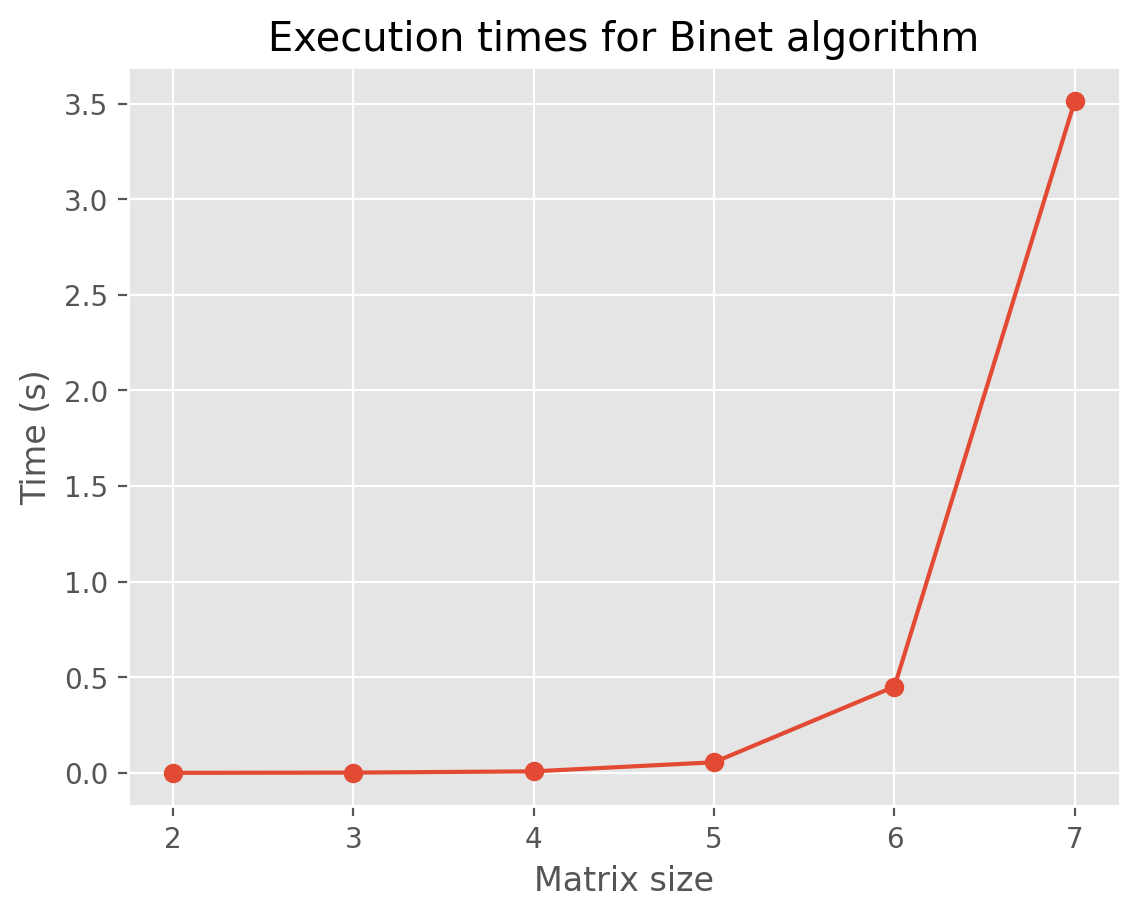

In [141]:
plot_execution_times(binet, test_matrices)

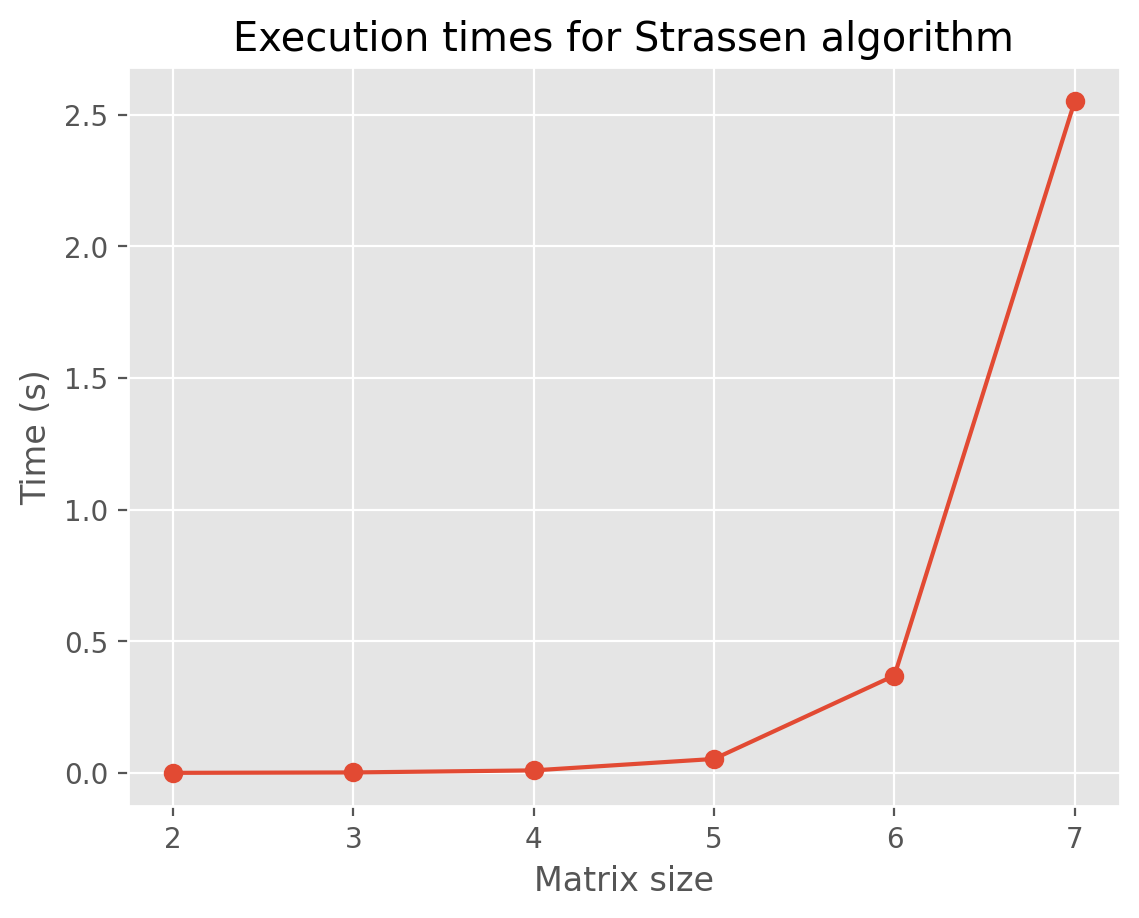

In [142]:
plot_execution_times(strassen, test_matrices)

### Porównanie liczby operacji zmienno-przecinkowych

In [146]:
def plot_flops(algorithm, test_matrices):
    flops = []
    for A, B in test_matrices:
        A, tmp_flops = algorithm(A, B)
        flops.append(tmp_flops)
    plt.title("Floating-point operations number for " + algorithm.__name__.title() + " algorithm")
    plt.xlabel("Matrix size")
    plt.ylabel("Floating-point operations number")
    plt.plot([i for i in range(2,k+1)] ,flops, 'o-')
    plt.show()

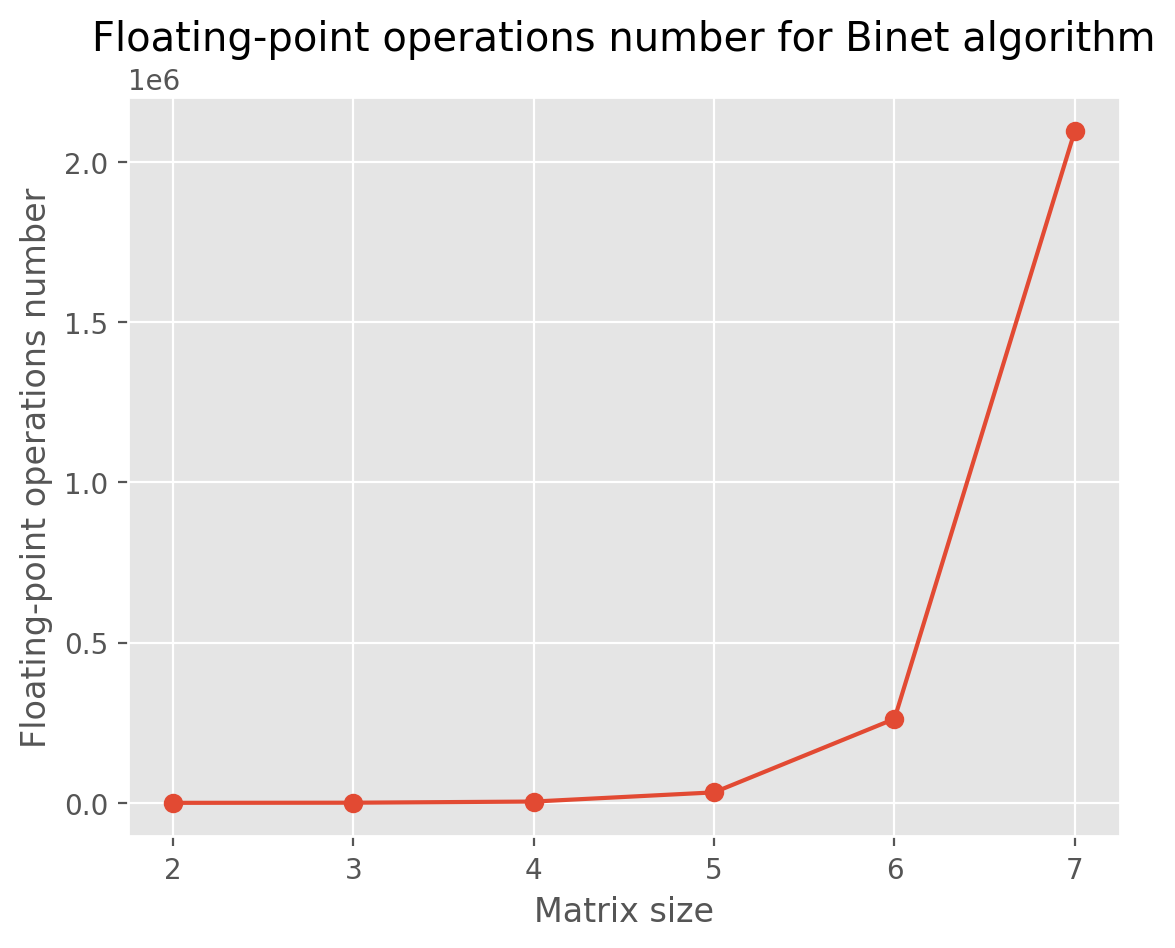

In [147]:
plot_flops(binet, test_matrices)

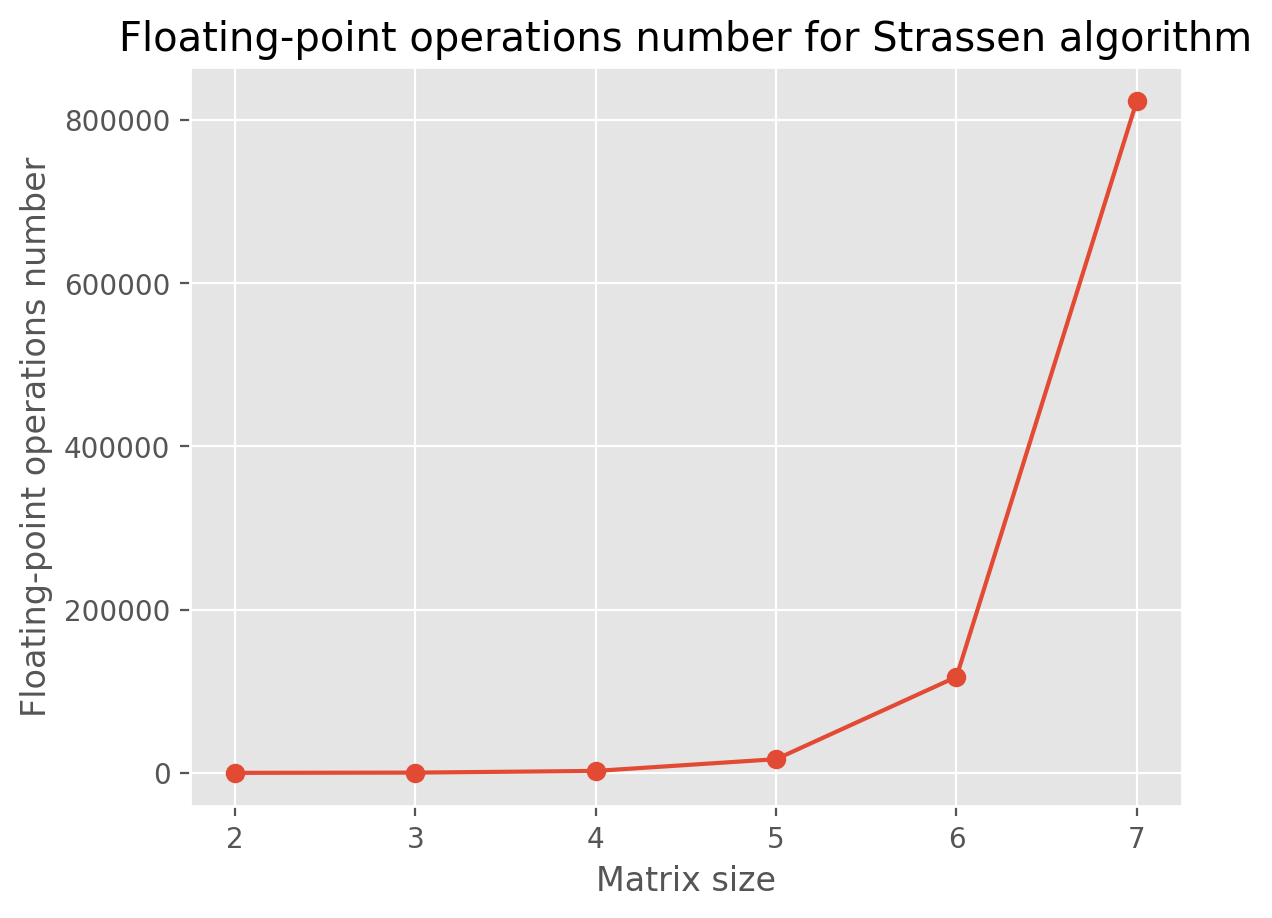

In [148]:
plot_flops(strassen, test_matrices)

## Wnioski

TODO